# Collection of all plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gvar as gv

from lametlat.utils.plot_settings import *
from lametlat.utils.resampling import bs_ls_avg
from lametlat.utils.constants import *

## Plots of raw data

In [2]:
from read_data import get_2pt_data, get_ratio_data, get_sum_data
from lametlat.preprocess.read_raw import pt2_to_meff

### Effective mass

/home/jinchen/git/package/LaMETLat/lametlat/preprocess/read_raw.py:70: RuntimeWarning: invalid value encountered in sqrt
  meff_array = np.arccosh( (pt2_array[2:] + pt2_array[:-2]) / (2 * pt2_array[1:-1]) ) #! This is not always correct.
/home/jinchen/git/package/LaMETLat/lametlat/preprocess/read_raw.py:70: RuntimeWarning: invalid value encountered in log
  meff_array = np.arccosh( (pt2_array[2:] + pt2_array[:-2]) / (2 * pt2_array[1:-1]) ) #! This is not always correct.


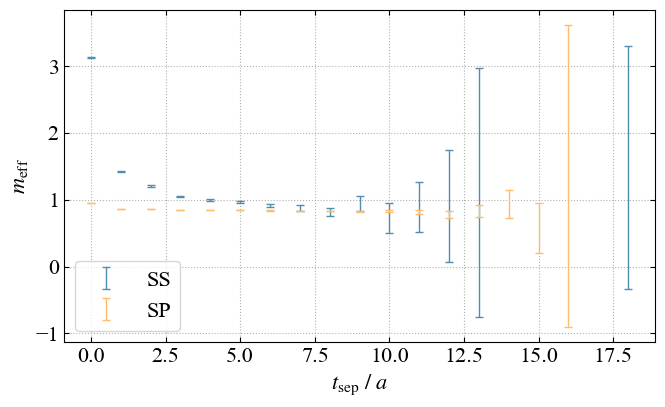

In [3]:
px = py = 4
pz = 0

pt2_ss_real, pt2_ss_imag = get_2pt_data("SS", px, py, pz, jk_bs="bs")

meff_ss = pt2_to_meff(bs_ls_avg(pt2_ss_real), boundary="periodic")[:20]

pt2_sp_real, pt2_sp_imag = get_2pt_data("SP", px, py, pz, jk_bs="bs")

meff_sp = pt2_to_meff(bs_ls_avg(pt2_sp_real), boundary="periodic")[:20]

x_ls = [np.arange(20), np.arange(20)]
y_ls = [gv.mean(meff_ss), gv.mean(meff_sp)]
yerr_ls = [gv.sdev(meff_ss), gv.sdev(meff_sp)]
label_ls = ["SS", "SP"]

fig, ax = default_plot()
for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(x, y, yerr=yerr, color=color_ls[idx], label=label_ls[idx], **errorb)
ax.set_xlabel(r"$t_{\mathrm{sep}}~/~a$", **fs_p)
ax.set_ylabel(r"$m_{\mathrm{eff}}$", **fs_p)
ax.legend(**fs_p)
plt.tight_layout()
plt.show()

### Ratio data plot

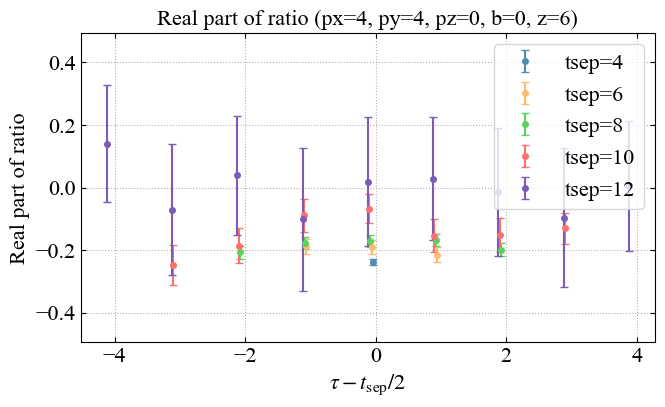

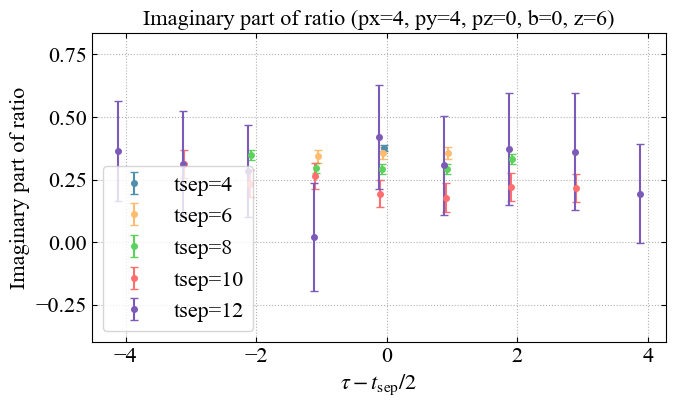

In [4]:
px = py = 4
pz = 0
b = 0
z = 6
tsep_ls = [4, 6, 8, 10, 12]
tau_cut_plot = 2
flavor = None  # None means (U-D)/2

ra_real, ra_imag = get_ratio_data(px, py, pz, b, z, tsep_ls, jk_bs="bs", flavor=flavor)
ra_real_avg = bs_ls_avg(ra_real)
ra_imag_avg = bs_ls_avg(ra_imag)

# * real part
x_ls = []
y_ls = []
yerr_ls = []
label_ls = []

for id in range(len(tsep_ls)):
    tsep = tsep_ls[id]
    x_ls.append(
        np.arange(tau_cut_plot, tsep + 1 - tau_cut_plot) - tsep / 2 - tsep * 0.01
    )
    y_ls.append(gv.mean(ra_real_avg)[id, tau_cut_plot : tsep + 1 - tau_cut_plot])
    yerr_ls.append(gv.sdev(ra_real_avg)[id, tau_cut_plot : tsep + 1 - tau_cut_plot])
    label_ls.append(f"tsep={tsep}")

fig, ax = default_plot()
for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(
        x,
        y,
        yerr=yerr,
        fmt="o",
        capsize=3,
        markersize=4,
        color=color_ls[idx],
        label=label_ls[idx],
    )

ax.set_xlabel(r"$\tau - t_{\mathrm{sep}}/2$", **fs_p)
ax.set_ylabel("Real part of ratio", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
plt.title(f"Real part of ratio (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()


# * Imaginary part
x_ls = []
y_ls = []
yerr_ls = []
label_ls = []

for id in range(len(tsep_ls)):
    tsep = tsep_ls[id]
    x_ls.append(
        np.arange(tau_cut_plot, tsep + 1 - tau_cut_plot) - tsep / 2 - tsep * 0.01
    )
    y_ls.append(gv.mean(ra_imag_avg)[id, tau_cut_plot : tsep + 1 - tau_cut_plot])
    yerr_ls.append(gv.sdev(ra_imag_avg)[id, tau_cut_plot : tsep + 1 - tau_cut_plot])
    label_ls.append(f"tsep={tsep}")

# Imaginary part
fig, ax = default_plot()
for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(
        x,
        y,
        yerr=yerr,
        fmt="o",
        capsize=3,
        markersize=4,
        color=color_ls[idx],
        label=label_ls[idx],
    )

ax.set_xlabel(r"$\tau - t_{\mathrm{sep}}/2$", **fs_p)
ax.set_ylabel("Imaginary part of ratio", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
plt.title(f"Imaginary part of ratio (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()

### Sum data plot

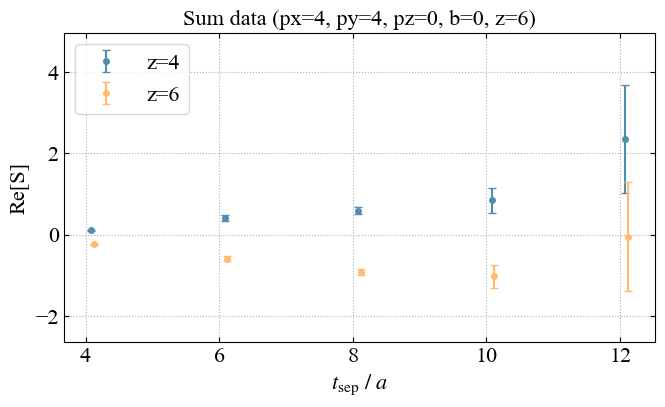

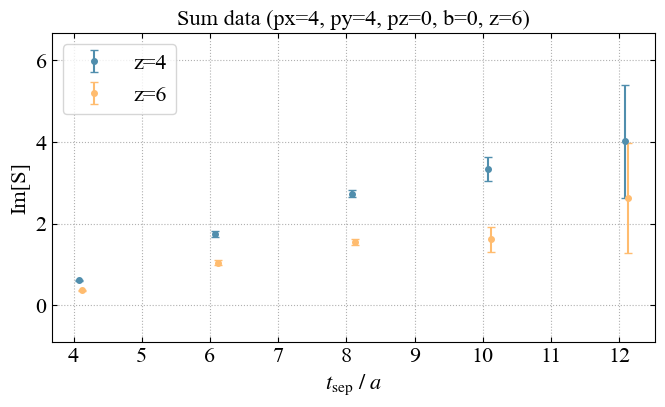

In [5]:
px = py = 4
pz = 0
b = 0
z = 6
tsep_ls = [4, 6, 8, 10, 12]
tau_cut_plot = 2
z_ls = np.arange(4, 8, 2)
flavor = None  # None means (U-D)/2


# * real part

x_ls, y_ls, yerr_ls, label_ls = [], [], [], []
for z in z_ls:
    sum_real, sum_imag = get_sum_data(
        px, py, pz, b, z, tsep_ls, jk_bs="bs", tau_cut=tau_cut_plot, flavor=flavor
    )
    sum_real_avg = bs_ls_avg(sum_real)

    x_ls.append(np.array(tsep_ls) + 0.02 * z)
    y_ls.append(gv.mean(sum_real_avg))
    yerr_ls.append(gv.sdev(sum_real_avg))
    label_ls.append(f"z={z}")

fig, ax = default_plot()

for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(
        x,
        y,
        yerr=yerr,
        fmt="o",
        capsize=3,
        markersize=4,
        color=color_ls[idx],
        label=label_ls[idx],
    )

ax.set_xlabel(r"$t_{\mathrm{sep}}~/~a$", **fs_p)
ax.set_ylabel(r"Re[S]", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
plt.title(f"Sum data (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()


# * Imaginary part

x_ls, y_ls, yerr_ls, label_ls = [], [], [], []
for z in z_ls:
    sum_real, sum_imag = get_sum_data(
        px, py, pz, b, z, tsep_ls, jk_bs="bs", tau_cut=tau_cut_plot, flavor=flavor
    )
    sum_imag_avg = bs_ls_avg(sum_imag)

    x_ls.append(np.array(tsep_ls) + 0.02 * z)
    y_ls.append(gv.mean(sum_imag_avg))
    yerr_ls.append(gv.sdev(sum_imag_avg))
    label_ls.append(f"z={z}")

fig, ax = default_plot()

for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
    ax.errorbar(
        x,
        y,
        yerr=yerr,
        fmt="o",
        capsize=3,
        markersize=4,
        color=color_ls[idx],
        label=label_ls[idx],
    )

ax.set_xlabel(r"$t_{\mathrm{sep}}~/~a$", **fs_p)
ax.set_ylabel(r"Im[S]", **fs_p)
ax.legend(**fs_p)
ax.set_ylim(auto_ylim(y_ls, yerr_ls))
plt.title(f"Sum data (px={px}, py={py}, pz={pz}, b={b}, z={z})", **fs_p)
plt.tight_layout()
plt.show()

## Plots of ground state fit

In [6]:
import lsqfit as lsf
from lametlat.utils.log import set_up_log, log_count_fit
from lametlat.gsfit.pt2_fit import single_2pt_fit
from lametlat.gsfit.ratio_fit import single_ra_fit
from lametlat.gsfit.sum_fit import single_sum_fit

a = 0.06
Ls = 48
Lt = 64

### 2pt tmin stability

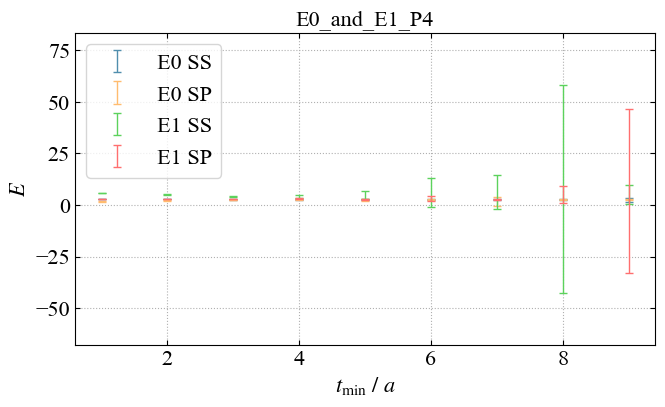

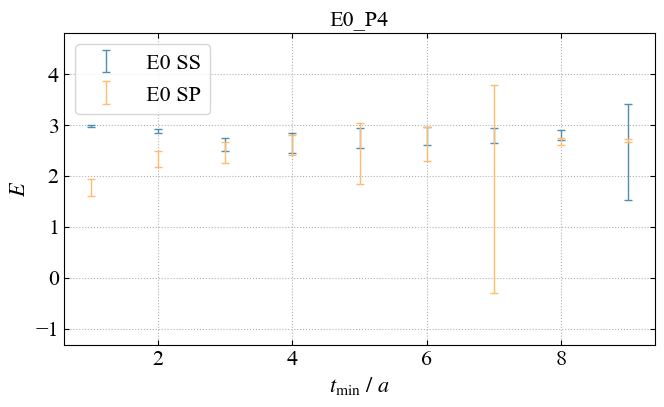

In [7]:
px = py = 4
pz = 0
tmin_ls = np.arange(1, 10)
tmax = 13
set_up_log("../log/gsfit/2pt.log")


# Retrieve and average the data once outside the loop
pt2_ss_re, _ = get_2pt_data("SS", px, py, pz, jk_bs="bs")
pt2_sp_re, _ = get_2pt_data("SP", px, py, pz, jk_bs="bs")
pt2_ss_avg = bs_ls_avg(pt2_ss_re)
pt2_sp_avg = bs_ls_avg(pt2_sp_re)

# Initialize lists to store fit results
fit_results = {
    "ss": {"e0": [], "e1": [], "Q": []},
    "sp": {"e0": [], "e1": [], "Q": []},
}

# Perform fits for each tmin value
for tmin in tmin_ls:
    ss_fit_res = single_2pt_fit(
        pt2_ss_avg, tmin, tmax, Lt, label=f"2pt_P{px}_tmin_{tmin}_SS"
    )
    sp_fit_res = single_2pt_fit(
        pt2_sp_avg, tmin, tmax, Lt, label=f"2pt_P{px}_tmin_{tmin}_SP"
    )

    # Append results to corresponding lists
    fit_results["ss"]["e0"].append(ss_fit_res.p["E0"])
    fit_results["ss"]["e1"].append(ss_fit_res.p["E0"] + ss_fit_res.p["dE1"])
    fit_results["ss"]["Q"].append(ss_fit_res.Q)

    fit_results["sp"]["e0"].append(sp_fit_res.p["E0"])
    fit_results["sp"]["e1"].append(sp_fit_res.p["E0"] + sp_fit_res.p["dE1"])
    fit_results["sp"]["Q"].append(sp_fit_res.Q)


# Define a function to plot the results
def plot_energy_levels(include_e1=False):
    """
    Plot the energy levels.

    Args:
        include_e1 (bool, optional): Whether to include the E1 energy level. Defaults to False.
    """

    e0_ss_gev_ls = [
        lat_unit_convert(val, a, Ls, dimension="M") for val in fit_results["ss"]["e0"]
    ]
    e0_sp_gev_ls = [
        lat_unit_convert(val, a, Ls, dimension="M") for val in fit_results["sp"]["e0"]
    ]
    e1_ss_gev_ls = [
        lat_unit_convert(val, a, Ls, dimension="M") for val in fit_results["ss"]["e1"]
    ]
    e1_sp_gev_ls = [
        lat_unit_convert(val, a, Ls, dimension="M") for val in fit_results["sp"]["e1"]
    ]

    x_ls = [tmin_ls] * (4 if include_e1 else 2)
    y_ls = [gv.mean(e0_ss_gev_ls), gv.mean(e0_sp_gev_ls)]
    yerr_ls = [gv.sdev(e0_ss_gev_ls), gv.sdev(e0_sp_gev_ls)]
    label_ls = [f"E0 SS", f"E0 SP"]

    if include_e1:
        y_ls.append(gv.mean(e1_ss_gev_ls))
        y_ls.append(gv.mean(e1_sp_gev_ls))
        yerr_ls.append(gv.sdev(e1_ss_gev_ls))
        yerr_ls.append(gv.sdev(e1_sp_gev_ls))
        label_ls.append(f"E1 SS")
        label_ls.append(f"E1 SP")

    fig, ax = default_plot()

    for idx, (x, y, yerr) in enumerate(zip(x_ls, y_ls, yerr_ls)):
        ax.errorbar(x, y, yerr=yerr, color=color_ls[idx], label=label_ls[idx], **errorb)

    ax.set_xlabel(r"$t_{\mathrm{min}}~/~a$", **fs_p)
    ax.set_ylabel(r"$E $", **fs_p)
    ax.legend(**fs_p)
    ax.set_ylim(auto_ylim(y_ls, yerr_ls))
    plt.title(f"E{'0_and_E1' if include_e1 else '0'}_P{px}", **fs_p)
    plt.tight_layout()
    plt.show()


# Plot energy levels
plot_energy_levels(include_e1=True)
plot_energy_levels(include_e1=False)

### Dispersion relation

Least Square Fit:
  chi2/dof [dof] = 0.22 [6]    Q = 0.97    logGBF = -5.5054

Parameters:
              m    0.93 (83)     [  1.0 (1.0) ]  
             c1    0.96 (37)     [  1.0 (1.0) ]  
             c2    0.08 (25)     [    0 ± 1.0 ]  

Fit:
     x[k]         y[k]    f(x[k],p)
-----------------------------------
  1.21764    5.7 (4.1)    1.52 (37)  *
  1.82646    1.78 (54)    2.04 (18)  
  2.43528    2.62 (13)    2.61 (11)  
   3.0441    3.21 (16)    3.22 (10)  
  3.65292    3.90 (25)    3.87 (16)  
  4.26174    4.53 (45)    4.56 (32)  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 5/0.0)
  fitter = scipy_least_squares    method = trf



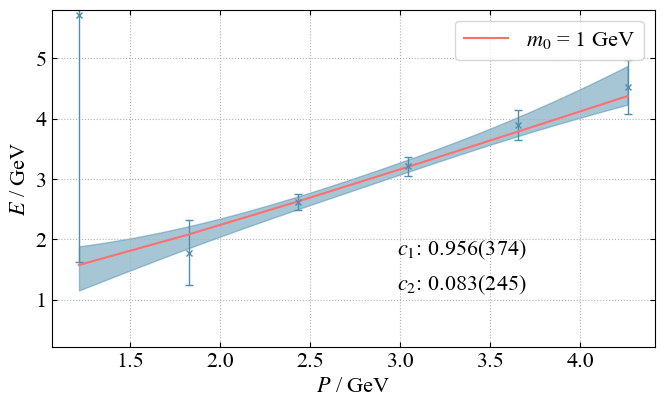

In [8]:
from lametlat.preprocess.dispersion import disp_relation_plot

tmin = 3
tmax = 13
pz = 0
m0 = 1
set_up_log("../log/gsfit/2pt.log")

mom_ls, e0_ss_ls, e0_sp_ls = [], [], []

for px in range(2, 8):
    py = px
    pnorm = np.sqrt(px**2 + py**2)

    pt2_ss_re, _ = get_2pt_data("SS", px, py, pz, jk_bs="bs")
    pt2_sp_re, _ = get_2pt_data("SP", px, py, pz, jk_bs="bs")
    pt2_ss_avg = bs_ls_avg(pt2_ss_re)
    pt2_sp_avg = bs_ls_avg(pt2_sp_re)

    ss_fit_res = single_2pt_fit(
        pt2_ss_avg, tmin, tmax, Lt, label=f"2pt_P{px}_SS"
    )
    sp_fit_res = single_2pt_fit(
        pt2_sp_avg, tmin, tmax, Lt, label=f"2pt_P{px}_SP"
    )
    
    e0_ss_ls.append(ss_fit_res.p["E0"])
    e0_sp_ls.append(sp_fit_res.p["E0"])
    mom_ls.append(pnorm)
    

ax = disp_relation_plot(a, Ls, mom_ls, e0_ss_ls, m0=1)

### Ratio fit plot

Least Square Fit:
  chi2/dof [dof] = 0.57 [42]    Q = 0.99    logGBF = 19.239

Parameters:
             E0    0.976 (49)     [  0.976 (50) ]  
       log(dE1)   -0.752 (67)     [ -0.752 (67) ]  
         pdf_re   -0.027 (96)     [      1 (10) ]  
         pdf_im    0.110 (93)     [      1 (10) ]  
         O01_re    0.076 (45)     [      1 (10) ]  
         O01_im    0.013 (42)     [      1 (10) ]  
         O11_re    -0.66 (60)     [      1 (10) ]  
         O11_im    -1.32 (88)     [      1 (10) ]  
          re_z0    0.129 (31)     [  0.129 (31) ]  
          re_z1   -0.351 (10)     [ -0.351 (10) ]  
-------------------------------------------------
            dE1    0.472 (31)     [  0.472 (32) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 8/0.0)
  fitter = scipy_least_squares    method = trf



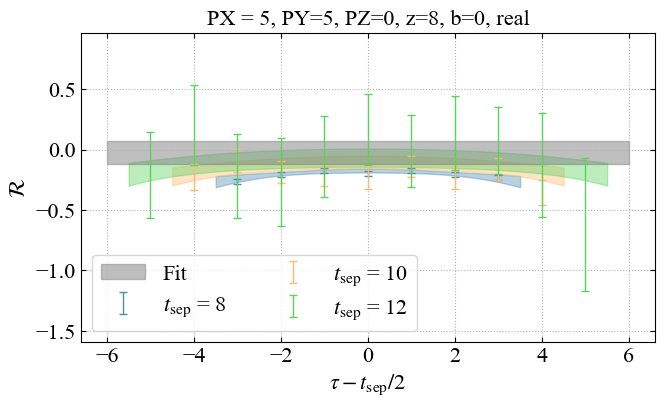

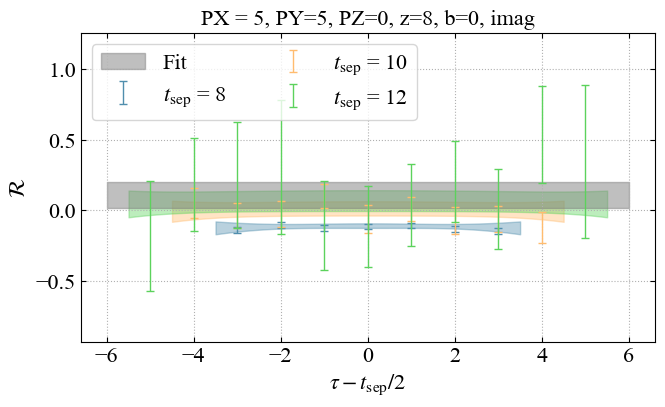

In [9]:
#! plot ratio fit on data
from lametlat.gsfit.ratio_fit import plot_ra_fit_on_data

px = py = 5
pz = 0
b = 0
z = 8
err_tsep_ls = [8, 10, 12]
fill_tsep_ls = [8, 10, 12]
tau_cut = 2


id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}

# * 2pt fit
# Retrieve 2pt data (real parts only, as imaginary parts are not used)
pt2_ss_re = get_2pt_data('SS', px, py, pz, jk_bs="bs")[0]
pt2_ss_avg = bs_ls_avg(pt2_ss_re)

# Perform single 2pt fits
ss_fit_res = single_2pt_fit(pt2_ss_avg, tmin=3, tmax=13, Lt=Lt, label=f"2pt_P{px}_SS")


# data for fit
ra_re, ra_im = get_ratio_data(px, py, pz, b, z, fill_tsep_ls, jk_bs="bs")

# Average over bootstraps.
ra_re_avg = bs_ls_avg(ra_re.reshape(len(ra_re), -1)).reshape(len(fill_tsep_ls), -1)
ra_im_avg = bs_ls_avg(ra_im.reshape(len(ra_im), -1)).reshape(len(fill_tsep_ls), -1)

ra_re_avg_dic = {}
ra_im_avg_dic = {}
for id, tsep in enumerate(fill_tsep_ls):
    ra_re_avg_dic[f'tsep_{tsep}'] = ra_re_avg[id]
    ra_im_avg_dic[f'tsep_{tsep}'] = ra_im_avg[id]


ra_fit_res = single_ra_fit(ra_re_avg_dic, ra_im_avg_dic, fill_tsep_ls, tau_cut, Lt, id_label, pt2_fit_res=ss_fit_res)
print(ra_fit_res)


# data for errorbar plot
ra_re, ra_im = get_ratio_data(px, py, pz, b, z, err_tsep_ls, jk_bs="bs")

# Average over bootstraps.
ra_re_avg = bs_ls_avg(ra_re.reshape(len(ra_re), -1)).reshape(len(err_tsep_ls), -1)
ra_im_avg = bs_ls_avg(ra_im.reshape(len(ra_im), -1)).reshape(len(err_tsep_ls), -1)

ax_real, ax_imag = plot_ra_fit_on_data(ra_re_avg, ra_im_avg, ra_fit_res, err_tsep_ls, fill_tsep_ls, Lt, id_label, err_tau_cut=1, fill_tau_cut=1)


>>> P-value of z = 0: 
0.8350770069381405

>>> P-value of z = 1: 
0.9016500246552648

>>> P-value of z = 2: 
0.8864432266588713

>>> P-value of z = 3: 
0.8871920122374325

>>> P-value of z = 4: 
0.8948283240396752

>>> P-value of z = 5: 
0.8774657986892982

>>> P-value of z = 6: 
0.8489726943142424

>>> P-value of z = 7: 
0.8242151100752779

>>> P-value of z = 8: 
0.7993305571047888

>>> P-value of z = 9: 
0.8025516869208563

>>> P-value of z = 10: 
0.8610991059051534

>>> P-value of z = 11: 
0.953237915512578

>>> P-value of z = 12: 
0.989881327484787

>>> P-value of z = 13: 
0.9957118835025173

>>> P-value of z = 14: 
0.9960549581151252

>>> P-value of z = 15: 
0.9948428005439696

>>> P-value of z = 16: 
0.9891726756519598

>>> P-value of z = 17: 
0.9694202642573326

>>> P-value of z = 18: 
0.9154054497897399

>>> P-value of z = 19: 
0.8252705864784435

>>> P-value of z = 20: 
0.780520538535154


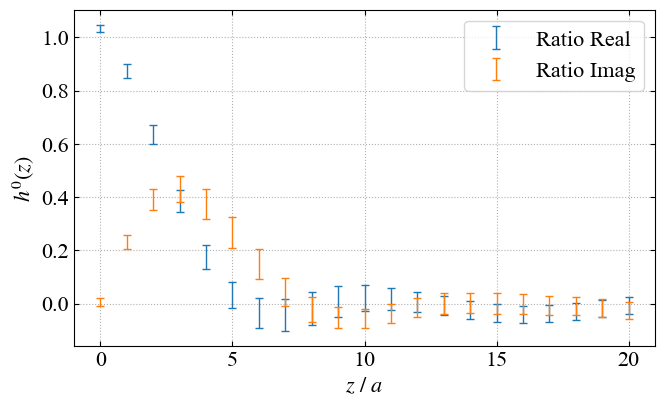

In [13]:
#! plot z-dependence

px = py = 4
pz = 0
b = 0
z_ls = np.arange(21)
tsep_ls = [6, 8, 10, 12]
tau_cut = 2

set_up_log("../log/gsfit/ratio.log")


# * 2pt fit
# Retrieve 2pt data (real parts only, as imaginary parts are not used)
pt2_ss_re = get_2pt_data('SS', px, py, pz, jk_bs="bs")[0]
pt2_ss_avg = bs_ls_avg(pt2_ss_re)

# Perform single 2pt fits
ss_fit_res = single_2pt_fit(pt2_ss_avg, tmin=3, tmax=13, Lt=Lt, label=f"2pt_P{px}_SS")

re_z_ls, im_z_ls = [], []

for z in z_ls:
    id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}
    
    ra_re, ra_im = get_ratio_data(px, py, pz, b, z, tsep_ls, jk_bs="bs")

    # Average over bootstraps.
    ra_re_avg = bs_ls_avg(ra_re.reshape(len(ra_re), -1)).reshape(len(tsep_ls), -1)
    ra_im_avg = bs_ls_avg(ra_im.reshape(len(ra_im), -1)).reshape(len(tsep_ls), -1)

    ra_re_avg_dic = {}
    ra_im_avg_dic = {}
    for id, tsep in enumerate(tsep_ls):
        ra_re_avg_dic[f'tsep_{tsep}'] = ra_re_avg[id]
        ra_im_avg_dic[f'tsep_{tsep}'] = ra_im_avg[id]


    ra_fit_res = single_ra_fit(ra_re_avg_dic, ra_im_avg_dic, tsep_ls, tau_cut, Lt, id_label, pt2_fit_res=ss_fit_res)
    
    print(f"\n>>> P-value of z = {id_label['z']}: ")
    print(ra_fit_res.Q)
    
    re_z_ls.append(ra_fit_res.p["pdf_re"])
    im_z_ls.append(ra_fit_res.p["pdf_im"])
    
fig, ax = default_plot()
ax.errorbar(z_ls, gv.mean(re_z_ls), yerr=gv.sdev(re_z_ls), label="Ratio Real", **errorb)
ax.errorbar(z_ls, gv.mean(im_z_ls), yerr=gv.sdev(im_z_ls), label="Ratio Imag", **errorb)
ax.set_xlabel(r"$z~/~a$", **fs_p)
ax.set_ylabel(r"$h^0 (z)$", **fs_p)
ax.legend(**fs_p)
plt.tight_layout()
plt.show()
    

### Summation fit plot

Least Square Fit:
  chi2/dof [dof] = 0.46 [8]    Q = 0.88    logGBF = -15.234

Parameters:
         pdf_re    1.030 (31)     [     0 ± 10 ]  
         pdf_im   -0.012 (35)     [     0 ± 10 ]  
          re_b1    -0.05 (19)     [     0 ± 10 ]  
          im_b1     0.08 (21)     [     0 ± 10 ]  
          re_b2        0 ± 10     [     0 ± 10 ]  
          im_b2        0 ± 10     [     0 ± 10 ]  
       log(dE1)        0 ± 10     [     0 ± 10 ]  
------------------------------------------------
            dE1        1 (10)     [     1 (10) ]  

Fit:
      key         y[key]      f(p)[key]
---------------------------------------
     re 0      3.09 (12)     3.035 (99)  
        1     5.036 (87)     5.095 (54)  
        2     7.180 (64)     7.155 (61)  
        3      8.80 (47)      9.22 (11)  
     im 0     -0.03 (12)      0.04 (11)  
        1     0.100 (91)     0.015 (56)  
        2    -0.026 (74)    -0.009 (69)  
        3     -0.41 (42)     -0.03 (13)  

Settings:
  svdcut/n = 1e-12/

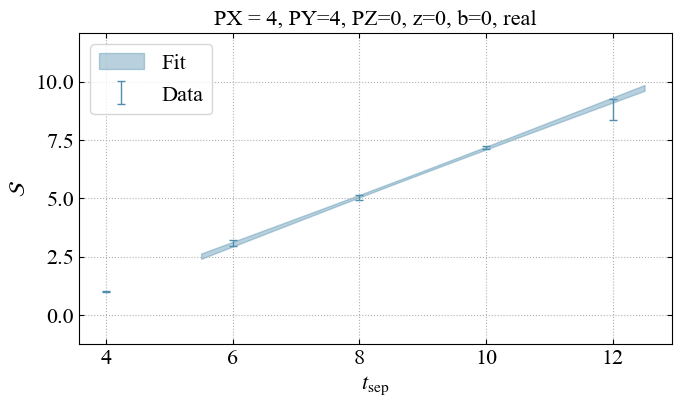

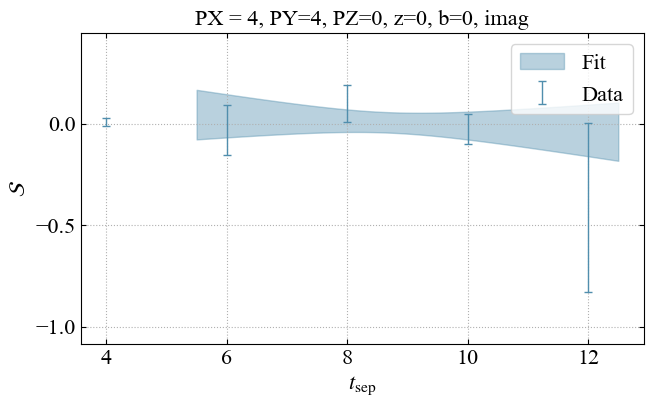

In [12]:
#! plot sum fit on data

from lametlat.gsfit.sum_fit import plot_sum_fit_on_data

px = py = 4
pz = 0
b = 0
z = 0
err_tsep_ls = [4, 6, 8, 10, 12]
fill_tsep_ls = [6, 8, 10, 12]
tau_cut = 2

id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}

# data for fit
sum_re, sum_im = get_sum_data(px, py, pz, b, z, fill_tsep_ls, jk_bs="bs", tau_cut=tau_cut)

# Average over bootstraps.
sum_re_avg = bs_ls_avg(sum_re)
sum_im_avg = bs_ls_avg(sum_im)

sum_fit_res = single_sum_fit(sum_re_avg, sum_im_avg, fill_tsep_ls, tau_cut, id_label)
print(sum_fit_res.format(100))

# data for errorbar plot
sum_re, sum_im = get_sum_data(px, py, pz, b, z, err_tsep_ls, jk_bs="bs", tau_cut=tau_cut)

# Average over bootstraps.
sum_re_avg = bs_ls_avg(sum_re)
sum_im_avg = bs_ls_avg(sum_im)

ax_real, ax_imag = plot_sum_fit_on_data(sum_re_avg, sum_im_avg, sum_fit_res, err_tsep_ls, fill_tsep_ls, id_label, tau_cut)


>>> P-value of z = 0: 
0.9946568423548947

>>> P-value of z = 1: 
0.893504858478647

>>> P-value of z = 2: 
0.974885306189876

>>> P-value of z = 3: 
0.9932522435435099

>>> P-value of z = 4: 
0.9962536280092337

>>> P-value of z = 5: 
0.9947075830684576

>>> P-value of z = 6: 
0.9852031192961461

>>> P-value of z = 7: 
0.9455017112357973

>>> P-value of z = 8: 
0.8261774248998817

>>> P-value of z = 9: 
0.656373283850331

>>> P-value of z = 10: 
0.5610039888189176

>>> P-value of z = 11: 
0.5757316829976828

>>> P-value of z = 12: 
0.6723282770339615

>>> P-value of z = 13: 
0.8131030992586722

>>> P-value of z = 14: 
0.92165889874504

>>> P-value of z = 15: 
0.9652047250920737

>>> P-value of z = 16: 
0.9795073451040482

>>> P-value of z = 17: 
0.9850179632964153

>>> P-value of z = 18: 
0.9837299759996053

>>> P-value of z = 19: 
0.9782996993580609

>>> P-value of z = 20: 
0.9775236055868262


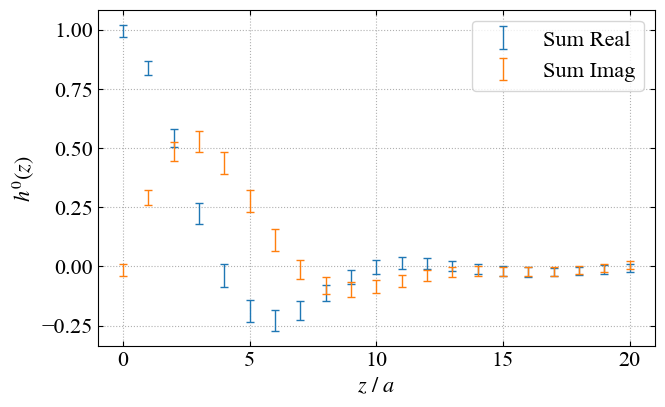

In [14]:
#! plot z-dependence

px = py = 5
pz = 0
b = 0
z_ls = np.arange(21)
tsep_ls = [6, 8, 10, 12]
tau_cut = 2

set_up_log("../log/gsfit/sum.log")

re_z_ls, im_z_ls = [], []

for z in z_ls:
    id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}
    
    sum_re, sum_im = get_sum_data(px, py, pz, b, z, tsep_ls, jk_bs="bs", tau_cut=tau_cut)

    # Average over bootstraps.
    sum_re_avg = bs_ls_avg(sum_re)
    sum_im_avg = bs_ls_avg(sum_im)


    sum_fit_res = single_sum_fit(sum_re_avg, sum_im_avg, tsep_ls, tau_cut, id_label)
    
    print(f"\n>>> P-value of z = {id_label['z']}: ")
    print(sum_fit_res.Q)
    
    re_z_ls.append(sum_fit_res.p["pdf_re"])
    im_z_ls.append(sum_fit_res.p["pdf_im"])
    
fig, ax = default_plot()
ax.errorbar(z_ls, gv.mean(re_z_ls), yerr=gv.sdev(re_z_ls), label="Sum Real", **errorb)
ax.errorbar(z_ls, gv.mean(im_z_ls), yerr=gv.sdev(im_z_ls), label="Sum Imag", **errorb)
ax.set_xlabel(r"$z~/~a$", **fs_p)
ax.set_ylabel(r"$h^0 (z)$", **fs_p)
ax.legend(**fs_p)
plt.tight_layout()
plt.show()